## NewsMood

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: BBC, CBS, CNN, Fox, and New York times.

The first plot will be and/or feature the following:

Be a scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
Each plot point will reflect the compound sentiment of a tweet.
Sort each plot point by its relative timestamp.
The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Your final Jupyter notebook must:

Pull last 100 tweets from each outlet.
Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
Export the data in the DataFrame into a CSV file.
Save PNG images for each plot.

## Analysis

Trend 1: As of March 7th, 2018, 6:20pm (and in previous hours), BBCNews consistantly has a more negative polarity score compared to the other news sources.

Trend 2: As of March 7th, 2018, 6:20pm, New York Times is the only news source with a positive average polarity.

Trend 3: The average polarity is not consistant throughout, therefore the polarity scores fluctuate based on current news.

In [7]:
#! pip install textblob

In [8]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import tweepy
import numpy as np
import seaborn as sns
import json

from datetime import datetime
from textblob import TextBlob, Word, Blobber

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [9]:
# Twitter API keys
import config 

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [10]:
# Search for the news stations
target_users = ["@BBCNews", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]

# Variables for holding lists
news_account = []
date = []
compound_list = []
positive_list = []
neutral_list = []
negative_list = []
tweet_count = []

In [11]:
# Loop through each news station to get the recent 100 tweets
for user in target_users:
    
    #Tweet count
    tweet_number = 0

    # Loop through all news stations
    for x in range(5):
    
        public_tweets = api.user_timeline(user, page=x) 
        
        # Loop through all tweets
        for tweet in public_tweets:
            
            tweet_number += 1
            
            # Create columns with information about tweet
            news_account.append(user)
            date.append(tweet['created_at'])
            tweet_count.append(tweet_number)

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            # Append the Vadar Analysis
            compound_list.append(compound)
            positive_list.append(pos)
            neutral_list.append(neu)
            negative_list.append(neg)


In [12]:
#Generate Dataframe 

# Creating dictionary for DataFrame
tweet_summary = {
    "News Channel": news_account,
    "Date": date,
    "Compound": compound_list,
    "Positive": positive_list,
    "Neutral": neutral_list,
    "Negative": negative_list,
    "Tweets Ago": tweet_count}

df_sentiment_analysis = pd.DataFrame(tweet_summary, columns = ['News Channel', 'Date', 'Compound', 'Positive',
                                               'Neutral', 'Negative', 'Tweets Ago'])
df_sentiment_analysis.head()

,News Channel,Date,Compound,Positive,Neutral,Negative,Tweets Ago
0,@BBCNews,Fri Mar 09 01:08:52 +0000 2018,-0.5994,0.0,0.719,0.281,1
1,@BBCNews,Thu Mar 08 22:37:52 +0000 2018,-0.8807,0.0,0.495,0.505,2
2,@BBCNews,Thu Mar 08 22:36:35 +0000 2018,-0.3412,0.0,0.862,0.138,3
3,@BBCNews,Thu Mar 08 22:36:18 +0000 2018,0.0000,0.0,1.000,0.000,4
4,@BBCNews,Thu Mar 08 22:36:03 +0000 2018,-0.4588,0.0,0.769,0.231,5


In [13]:
# Create CSV from dataframe
df_sentiment_analysis.to_csv('NewsSentimentAnalysis.csv')

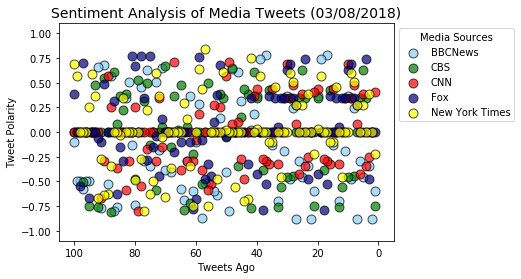

In [14]:
# Plot the sentiments of the last 100 tweets

bbc = df_sentiment_analysis.loc[df_sentiment_analysis['News Channel'] == '@BBCNews']
cbs = df_sentiment_analysis.loc[df_sentiment_analysis['News Channel'] == '@CBSNews']
cnn = df_sentiment_analysis.loc[df_sentiment_analysis['News Channel'] == '@CNN']
fox = df_sentiment_analysis.loc[df_sentiment_analysis['News Channel'] == '@FoxNews']
nyt = df_sentiment_analysis.loc[df_sentiment_analysis['News Channel'] == '@nytimes']

# Plotting Twitter info
plt.scatter(bbc['Tweets Ago'], bbc['Compound'], c='lightskyblue', edgecolor='k', s=80, alpha=0.7, label='BBCNews')
plt.scatter(cbs['Tweets Ago'], cbs['Compound'], c='green', edgecolor='k', s=80, alpha=0.7, label='CBS')
plt.scatter(cnn['Tweets Ago'], cnn['Compound'], c='red', edgecolor='k', s=80, alpha=0.7, label='CNN')
plt.scatter(fox['Tweets Ago'], fox['Compound'], c='navy', edgecolor='k',s=80, alpha=0.7, label='Fox')
plt.scatter(nyt['Tweets Ago'], nyt['Compound'], c='yellow', edgecolor='k', s=80, alpha=0.7, label='New York Times')

now = datetime.now()
now = now.strftime("%m/%d/%Y")
plt.title('Sentiment Analysis of Media Tweets ({})'.format(now),fontsize=(14))

plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.xlim(105,-5)
plt.ylim(-1.1,1.1)

plt.legend(bbox_to_anchor=(1, 1),title='Media Sources')

plt.show()
plt.savefig("SentimentAnalysis.png") 

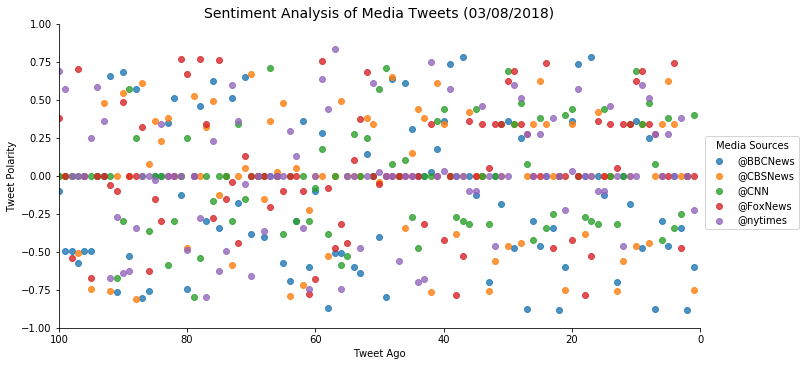

In [33]:
# Using Seaborn - test run
scatter_plot = sns.lmplot('Tweets Ago', 'Compound', data=df_sentiment_analysis, aspect=2, fit_reg=False, hue='News Channel', legend=False).add_legend(loc="best", title = "Media Sources")
scatter_plot = (scatter_plot.set_axis_labels("Tweet Ago","Tweet Polarity").set(xlim=(100,0),ylim=(-1,1)))
now = datetime.now()
now = now.strftime("%m/%d/%Y")
plt.title('Sentiment Analysis of Media Tweets ({})'.format(now),fontsize=(14))
plt.show()

In [22]:
# Create Overall Media Sentiment based on Twitter table
Twitter_summary = df_sentiment_analysis.groupby(["News Channel"])["Compound"].mean().reset_index()

# Renaming Columns
Twitter_summary.rename_axis({'News Channel': 'News Channel', 'Compound':  'Average Compound'},axis=1,inplace=True)

# Output Twitter Table dataframe
Twitter_summary

,News Channel,Average Compound
0,@BBCNews,-0.119079
1,@CBSNews,-0.003341
2,@CNN,-0.000721
3,@FoxNews,0.044667
4,@nytimes,0.015734


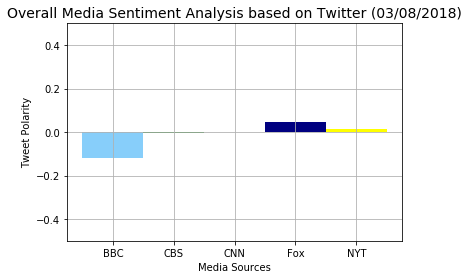

In [24]:
# Plot bar graph
plt.bar(0, bbc['Compound'].mean(), color='lightskyblue', width=1)
plt.bar(1, cbs['Compound'].mean(), color='green', width=1)
plt.bar(2, cnn['Compound'].mean(), color='red', width=1)
plt.bar(3, fox['Compound'].mean(), color='navy', width=1)
plt.bar(4, nyt['Compound'].mean(), color='yellow', width=1)

# Sets the y limits of the current chart
plt.ylim(-0.5,0.5)

# Give chart some labels and a tile
now = datetime.now()
now = now.strftime("%m/%d/%Y")
plt.title('Overall Media Sentiment Analysis based on Twitter ({})'.format(now),fontsize=(14))
plt.xlabel("Media Sources")
x_labels = ["BBC", "CBS", "CNN", "Fox", "NYT"]
x_locations = [value for value in np.arange(5)]
plt.xticks(x_locations, x_labels)
plt.ylabel("Tweet Polarity")
plt.grid()

# Print our chart to the screen and save image
plt.show()
plt.savefig("OverallSentimentAnalysisTwitter.png")

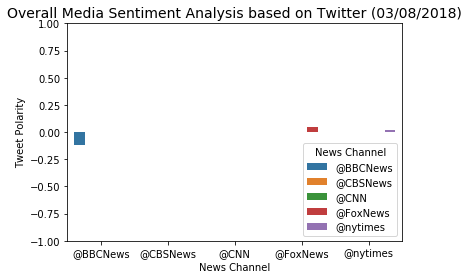

In [35]:
# Using Seaborn - test run

bar_plot = sns.barplot(x=Twitter_summary['News Channel'], y=Twitter_summary['Average Compound'], hue=Twitter_summary['News Channel'], data=Twitter_summary,
                 order=["@BBCNews", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"])

# Sets the y limits of the current chart
plt.ylim(-1,1)
# Give our chart some labels and a tile
now = datetime.now()
now = now.strftime("%m/%d/%Y")
plt.title('Overall Media Sentiment Analysis based on Twitter ({})'.format(now),fontsize=(14))
plt.xlabel("News Channel")
plt.ylabel("Tweet Polarity")

plt.show()